# Mallet

Another algorithm for topic modeling is implemented in the java-based software Mallet. For this to work **you need to download and install Mallet** from http://mallet.cs.umass.edu/download.php.
Mallet uses plain text as input, so none of the preprocessing steps of this package are available for Mallet topic modeling as of yet.

#### Loading modules from DARIAH-Topics library
First, we have to get access to the functionalities of the library by importing them. For using its functions we use the prefix of the toolbox's submodules (pre, visual and mallet).

In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import mallet as mal

#### Activating inline output in Jupyter notebook
The following line will just tell the notebook to show graphics in the output frames.

In [2]:
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/traitlets/traitlets.py:809: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new (traitlets 4.1) @observe(change) API
  clsname, change_or_name), DeprecationWarning)
/usr/lib/python3.4/importlib/_bootstrap.py:321: DeprecationWarning: `IPython.lib.inputhook` is deprecated since IPython 5.0 and will be removed in future versions.
  return f(*args, **kwds)
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:327: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in future versions.
  @inputhook_manager.register('osx')
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:336: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in future versions.
  @inputhook_manager.register('wx')
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:398: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in futu

## 1. Setting the parameters

#### Define path to corpus folder

In [3]:
path_to_corpus = "corpus_txt"

#### Path to mallet folder 

Now we must tell the library where to find the local instance of mallet. If you managed to install Mallet, it is sufficient set `path_to_mallet = "mallet"`, if you just store Mallet in a local folder, you have to specify the path to the binary explictly.

In [4]:
path_to_mallet = "/home/steffen/Software/mallet/bin/mallet"

#### Output folder

In [5]:
outfolder = "tutorial_supplementals/mallet_output"

#### The Mallet corpus model

Finally, we can give all these folder paths to a Mallet function that handles all the preprocessing steps and creates a Mallet-specific corpus model object.

In [7]:
mallet_model = mal.create_mallet_model(path_to_mallet = path_to_mallet, 
                                       outfolder = outfolder,
                                       path_to_corpus = path_to_corpus
                                      )

['/home/steffen/Software/mallet/bin/mallet', 'import-dir', '--input', 'corpus_txt', '--output', 'tutorial_supplementals/mallet_output/malletModel.mallet', '--keep-sequence', '--remove-stopwords']
Accessing Mallet ...


## 2. Model creation

**Warning: this step can take quite a while!** Meaning something between some seconds and some hours depending on corpus size and the number of passes.

In [8]:
output_folder = mal.create_mallet_output(path_to_mallet = path_to_mallet, 
                                         path_to_malletModel = mallet_model, 
                                         outfolder = outfolder
                                        )

### 2.4. Create document-topic matrix

The generated model object can now be translated into a human-readable document-topic matrix (that is a actually a pandas data frame) that constitutes our principle exchange format for topic modeling results. For generating the matrix from a Gensim model, we can use the following function:

In [9]:
doc_topic = mal.show_docTopicMatrix(output_folder, "doc_topics.txt")

## 3. Visualization

Now we can see the topics in the model with the following function:

In [10]:
mal.show_topics_keys(output_folder, topicsKeyFile = "topic_keys.txt")

,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9,Key 10
Topic 1,back,long,head,knew,heard,white,hands,stood,black,side
Topic 2,great,made,time,thought,things,thing,place,years,house,found
Topic 3,holmes,sir,man,moor,watson,henry,case,baskerville,friend,house
Topic 4,ravager,smallest,dog,moore,slippers,proper,master,wented,tags,told
Topic 5,hand,asked,room,hope,case,appeared,found,gave,answered,young
Topic 6,man,time,don't,small,face,day,good,make,thought,put
Topic 7,fact,matter,atoms,point,centre,general,force,idea,sun,universe
Topic 8,mowgli,jungle,big,bagheera,thou,wolf,sea,nag,baloo,men
Topic 9,conan,eyes,door,man,sword,men,blood,girl,hand,wall
Topic 10,camp,land,lake,feet,city,danforth,world,mountains,vast,antarctic


### 3.1. Distribution of topics

#### Distribution of topics over all documents

The distribution of topics over all documents can now be visualized in a heat map:

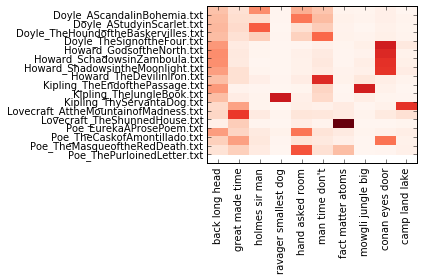

In [11]:
heatmap = visual.doc_topic_heatmap(doc_topic)
heatmap.show()

#### Distribution of topics in a single documents

To take closer look on the topics in a single text, we can use the follwing function that shows all the topics in a text and their respective proportions. To select the document, we have to give its index to the function.

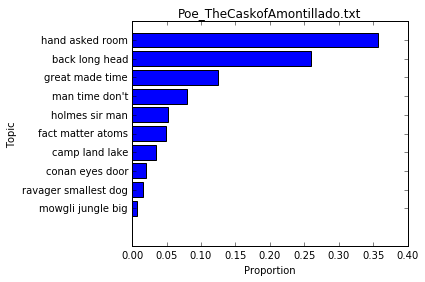

In [12]:
visual.plot_doc_topics(doc_topic, 6)